In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import konlpy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
import matplotlib as mpl
import matplotlib.font_manager as fm

In [14]:
from google.colab import files
file = files.upload()


Saving 과제_뉴스 기사.txt to 과제_뉴스 기사 (1).txt


In [65]:
with open('과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()

In [66]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [70]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)
nanum_font = [f for f in sys_font if 'Nanum' in f] 
print(f"nanum_font number: {len(nanum_font)}") 

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-R

In [73]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [72]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [74]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/sha

In [75]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
            
current_font()

Python 3.7.12
설정 폰트 글꼴: ['NanumGothic'], 설정 폰트 사이즈: 10.0


In [76]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


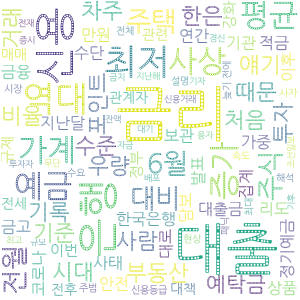

In [77]:
wordcloud = WordCloud(
    max_font_size=60,
    width = 300,
    height = 300,
    relative_scaling='auto',
    background_color='white',
    font_path=path)
wordcloud.generate_from_frequencies(c)
wordcloud.to_image()

In [32]:
from google.colab import files
file = files.upload()


Saving train.csv to train.csv


In [33]:
train = pd.read_csv('train.csv')

In [78]:
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,요일,연,월,일,시간,분,초
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,2011,01,01,04,00,00


In [79]:
import datetime as dt

In [80]:
g=[]
for i in range(0,10886):
    x = dt.datetime.strptime(train['datetime'][i], "%Y-%m-%d %H:%M:%S")
    g.append(x.weekday())

train['요일'] = g

TypeError: ignored

In [80]:
train.datetime = pd.to_datetime(train.datetime)


In [81]:
train["연"] = train.datetime.dt.strftime("%Y")
train["월"] = train.datetime.dt.strftime("%m")
train["일"] = train.datetime.dt.strftime("%d")
train["시간"] = train.datetime.dt.strftime("%H")
train["분"] = train.datetime.dt.strftime("%M")
train["초"] = train.datetime.dt.strftime("%S")

In [83]:
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(0,7):
    train['요일'] = train['요일'].replace(i, day[i])


In [84]:
import seaborn as sns


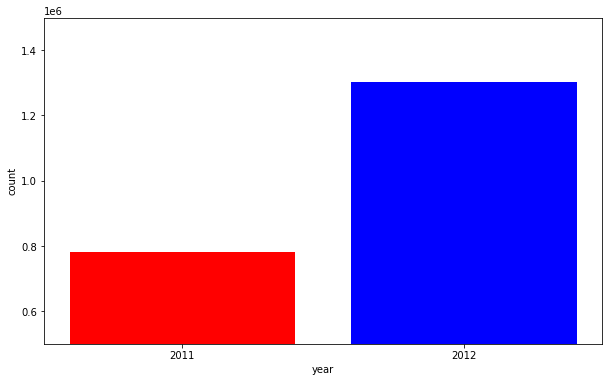

In [85]:
plt.figure(figsize=(10,6))
plt.bar( x=[2011,2012], height=train.groupby('연').sum()['count'], color=['red','blue'])
plt.xlabel('year')
plt.ylabel('count')
plt.xticks([2011,2012], 
           ['2011','2012'])
plt.ylim(500000, 1500000)
plt.show()

In [86]:
train['월'].unique()


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

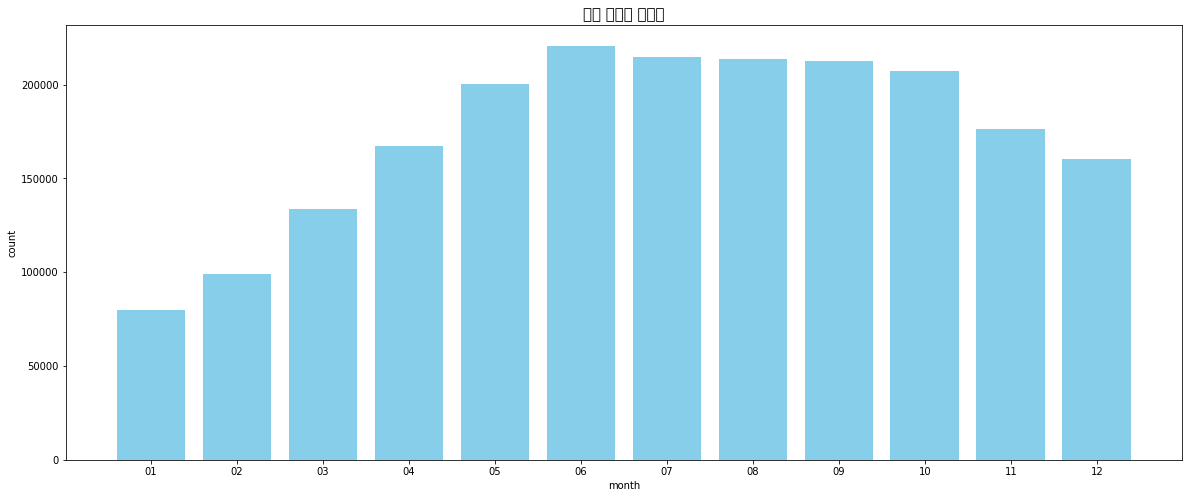

In [87]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20,8))
plt.bar( x=train['월'].unique(), height=train.groupby('월').sum()['count'], color='skyblue')
plt.xlabel('month')
plt.ylabel('count')
plt.title('월별 자전거 대여량', size=15)
plt.show()

In [89]:
train_c = train.copy()


In [90]:
train_c['year_month']= train_c['연']+'_'+train_c['월']



In [91]:
train_c.groupby('시간').sum()['count'].sort_index()


시간
00     25088
01     15372
02     10259
03      5091
04      2832
05      8935
06     34698
07     96968
08    165060
09    100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

In [92]:
train_c.year_month.unique()


array(['2011_01', '2011_02', '2011_03', '2011_04', '2011_05', '2011_06',
       '2011_07', '2011_08', '2011_09', '2011_10', '2011_11', '2011_12',
       '2012_01', '2012_02', '2012_03', '2012_04', '2012_05', '2012_06',
       '2012_07', '2012_08', '2012_09', '2012_10', '2012_11', '2012_12'],
      dtype=object)

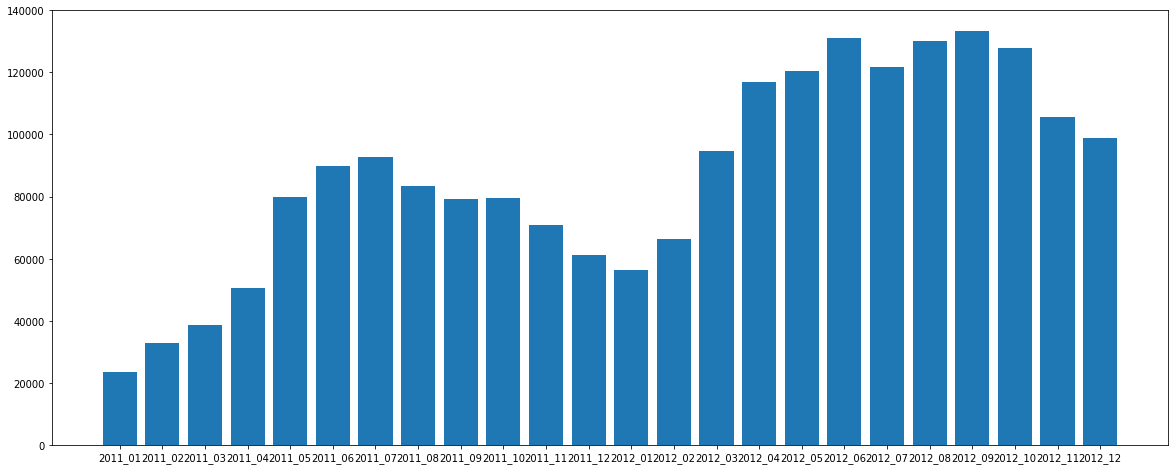

In [93]:
plt.figure(figsize=(20,8))
plt.bar( x=train_c.year_month.unique(), height=train_c.groupby('year_month').sum()['count'])
plt.show()

In [95]:
train_c.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,요일,연,월,일,시간,분,초,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,2011,01,01,00,00,00,2011_01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,2011,01,01,01,00,00,2011_01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,2011,01,01,02,00,00,2011_01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,2011,01,01,03,00,00,2011_01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,2011,01,01,04,00,00,2011_01


In [96]:
t_1 = train1.pivot_table(index='시간', columns=['holiday'], values=['count'], aggfunc='mean')


In [97]:
t_2 = train1.pivot_table(index='시간', columns=['workingday'], values=['count'], aggfunc='mean')


In [98]:
t_1.head()

count           
holiday          0          1
시간                           
00       54.796380  66.769231
01       33.582766  43.230769
02       22.747126  28.000000
03       11.738717  12.416667
04        6.377622   7.384615

In [99]:
t_2.head()

count           
workingday          0          1
시간                              
00          94.489655  36.732258
01          71.910345  16.003236
02          53.748252   8.436066
03          25.534722   4.892734
04           8.544828   5.363636

In [101]:
d0 = train_c.groupby(['시간']).agg('sum')['count']
d1 = train_c.groupby(['시간']).agg('mean')['count']

In [100]:
train_c['시간'].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [102]:
d1

시간
00     55.138462
01     33.859031
02     22.899554
03     11.757506
04      6.407240
05     19.767699
06     76.259341
07    213.116484
08    362.769231
09    221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text

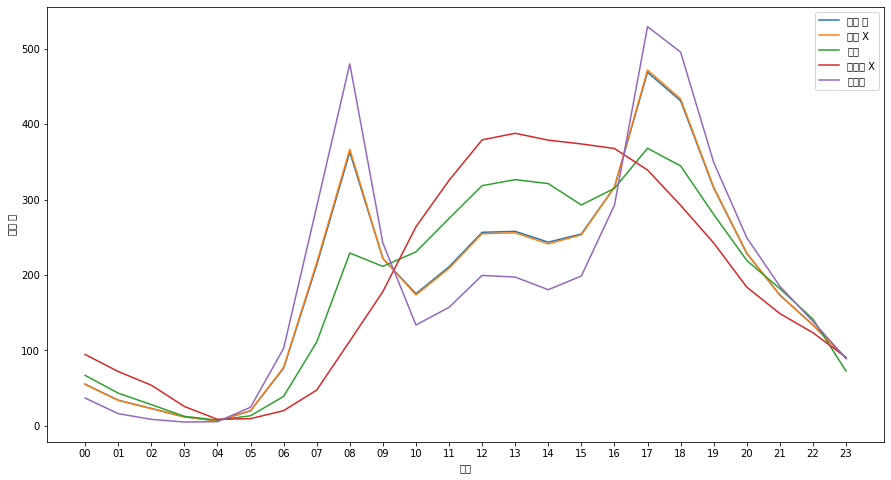

In [103]:
plt.figure(figsize=(15,8))
plt.plot(train_c['시간'].unique(), d1)
plt.plot(train_c['시간'].unique(), t_1)
plt.plot(train_c['시간'].unique(), t_2)
plt.xlabel('시간')
plt.ylabel('대여 수')
plt.legend(['시간 별', '휴일 X','휴일','근무일 X','근무일'])

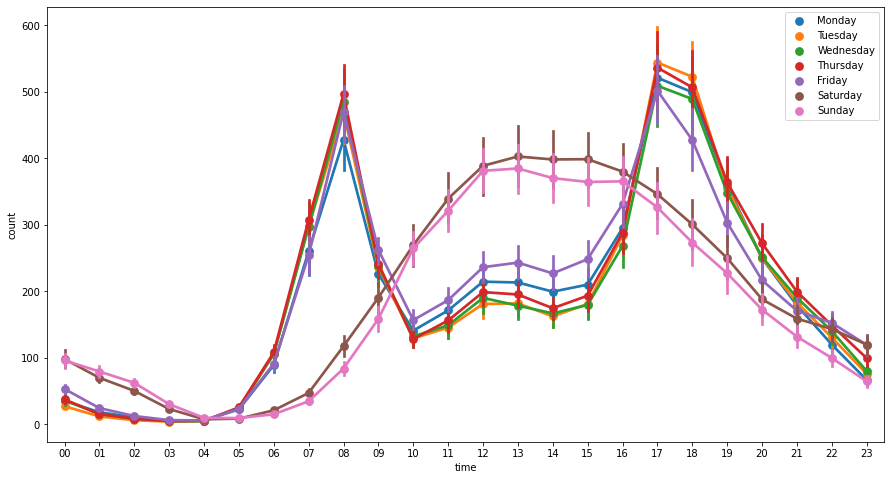

In [104]:
plt.figure(figsize=(15,8))
sns.pointplot(data=train, x='시간', y='count', hue='요일', hue_order=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.legend()
plt.xlabel('time')
plt.show()

In [59]:
mpg = sns.load_dataset('mpg')

In [60]:
mpg.model_year

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model_year, Length: 398, dtype: int64

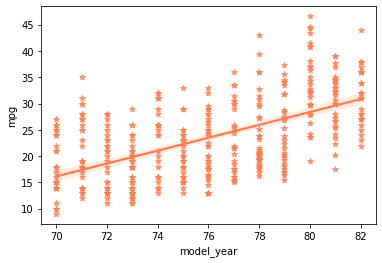

In [61]:
sns.regplot(x='model_year', y = 'mpg', data=mpg,color='coral', marker='*')
plt.show()